# Introducción, objetivos y contenido
====================================================================================================================================

Contenidos:

* Importación de librerías
* Carga de datos
* Preprocesamiento: gestión de tipos de datos, valores nulos y duplicados, características
    * Dataset USZIP
    * Dataset BUSINESS
    * Dataset CHECKIN
    * Dataset USER
* Análisis de datos
    * Análisis de oferta
    * Análisis de demanda
    * Análisis de usuario
        * Categorías top
        * Marcas top
        * Locaciones top
* Conclusiones

# Importación de librerías
====================================================================================================================================

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from math import factorial
from scipy import stats as st
import json
import gzip
import pickle

# Carga de datos
====================================================================================================================================

In [2]:
# Yelp
business = pd.read_pickle('dataset_business.pkl')
checkin = pd.read_json('dataset_checkin.json', lines=True)
user = pd.read_parquet('dataset_user-001.parquet')

In [3]:
# Base de datos externa
uszip = pd.read_excel('dataframe_uszips.xlsx')

# Preprocesamiento
====================================================================================================================================

## Dataset USZIP (externo)

In [4]:
print(uszip.info())
uszip.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33787 entries, 0 to 33786
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   postal_code       33787 non-null  int64  
 1   lat               33787 non-null  float64
 2   lng               33787 non-null  float64
 3   city              33787 non-null  object 
 4   state             33787 non-null  object 
 5   state_name        33787 non-null  object 
 6   zcta              33787 non-null  bool   
 7   parent_zcta       0 non-null      float64
 8   population        33770 non-null  float64
 9   density           33770 non-null  float64
 10  county_fips       33787 non-null  int64  
 11  county_name       33787 non-null  object 
 12  county_weights    33787 non-null  object 
 13  county_names_all  33787 non-null  object 
 14  county_fips_all   33787 non-null  object 
 15  imprecise         33787 non-null  bool   
 16  military          33787 non-null  bool  

,postal_code,lat,lng,city,state,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
4929,16030,41.13619,-79.79699,Eau Claire,PA,Pennsylvania,True,NaN,327.0,119.1,42019,Butler,"{""42019"": 100}",Butler,42019,False,False,America/New_York
25104,71665,33.93812,-92.13163,Rison,AR,Arkansas,True,NaN,5191.0,6.2,5025,Cleveland,"{""05025"": 97.25, ""05069"": 2.75}",Cleveland|Jefferson,05025|05069,False,False,America/Chicago


In [5]:
uszip = uszip[['postal_code', 'state']]
uszip['postal_code'] = uszip['postal_code'].astype(str)

uszip.info()
uszip.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33787 entries, 0 to 33786
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   postal_code  33787 non-null  object
 1   state        33787 non-null  object
dtypes: object(2)
memory usage: 528.1+ KB


,postal_code,state
9323,28791,NC
20792,59901,MT


## Dataset BUSINESS

In [6]:
print(business.info())
business.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
131299,F6rHQmm_Zbpg_y6GSHJgfw,St. Louis Bread,116 N 6th St,St. Louis,AZ,63101,38.627097,-90.190392,3.0,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78125,IVtHT1QIle45bFoCy7q_dg,Serenity Skin,119 Franklin Rd,Brentwood,PA,37027,36.036168,-86.787777,3.5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120416,OLa-9kI4kWN37vh74lbYwg,Sperry's Restaurant,5109 Harding Pike,Nashville,MO,37205,36.104856,-86.868578,4.0,173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103959,02zmTFH6P_u2Z_TISOVNFA,Indy Taco Fest,3585 Commercial Dr,Indianapolis,PA,46222,39.817337,-86.227073,4.5,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72024,loJUJg7ahGYga3EmLabiOA,Rally's,3555 General De Gaulle Dr,New Orleans,TN,70114,29.924608,-90.021881,2.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Selección de campos
dfybsn = business[['business_id', 'name', 'state', 'city', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open']]

# Eliminación de columnas duplicadas
dfybsn = dfybsn.loc[:,~dfybsn.columns.duplicated()]

# Adcuación de tipos de datos
dfybsn['latitude'] = pd.to_numeric(dfybsn['latitude'], errors='coerce')
dfybsn['longitude'] = pd.to_numeric(dfybsn['longitude'], errors='coerce')
dfybsn['stars'] = pd.to_numeric(dfybsn['stars'], errors='coerce')
dfybsn['review_count'] = pd.to_numeric(dfybsn['review_count'], errors='coerce')
dfybsn['is_open'] = pd.to_numeric(dfybsn['is_open'], errors='coerce')

# Eliminación de duplicados
dfybsn.drop_duplicates()

'''Reemplazo de valores del campo "state": los valores del dataset original no se corresponden con los códigos postales, 
por lo cual se utilizará una base de datos externa para corregir esta serie.'''

dfybsn.drop(columns=['state'], inplace=True)
dfybsn = pd.merge(dfybsn, uszip, on='postal_code', how='left')

# Campos auxiliares
dfybsn.dropna(subset=['state'], inplace=True)
dfybsn['state_city'] = dfybsn['state'].str.cat(dfybsn['city'], sep=' - ')
dfybsn['city_postalcode'] = dfybsn['city'].str.cat(dfybsn['postal_code'], sep=' - ')
dfybsn['state_city_postalcode'] = dfybsn['state'].str.cat(dfybsn['city'], sep=' - ').str.cat(dfybsn['postal_code'], sep=' - ')

dfybsn.info()
dfybsn.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 135158 entries, 0 to 150345
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   business_id            135158 non-null  object 
 1   name                   135158 non-null  object 
 2   city                   135158 non-null  object 
 3   postal_code            135158 non-null  object 
 4   latitude               135158 non-null  float64
 5   longitude              135158 non-null  float64
 6   stars                  135158 non-null  float64
 7   review_count           135158 non-null  int64  
 8   is_open                135158 non-null  int64  
 9   state                  135158 non-null  object 
 10  state_city             135158 non-null  object 
 11  city_postalcode        135158 non-null  object 
 12  state_city_postalcode  135158 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.4+ MB


,business_id,name,city,postal_code,latitude,longitude,stars,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode
19743,9kHYXO_reiMiNJ5_SKFcQw,Bloomingdale Florist,Brandon,33511,27.893148,-82.272481,4.0,25,1,FL,FL - Brandon,Brandon - 33511,FL - Brandon - 33511
145593,jVC8lAPGLlv0kVcIHV4_qQ,Clauser Tree Care,Chalfont,18914,40.285429,-75.243167,4.5,9,1,PA,PA - Chalfont,Chalfont - 18914,PA - Chalfont - 18914


## Creación de dataset RESTAURANTES

In [8]:
# Selección de campos
dfybct = business[['business_id', 'categories']]

# Eliminación de columnas duplicadas
dfybct = dfybct.loc[:,~dfybct.columns.duplicated()]

# Adecuación de campos
dfybct = dfybct.explode('categories')
dfybct = dfybct.assign(categories=dfybct['categories'].str.split(', ')).explode('categories')
dfybct.reset_index(drop=True, inplace=True)

# Eliminación de duplicados
dfybct.drop_duplicates()

# Eliminación de nulos
dfybct = dfybct.dropna(subset=['categories'])

dfybct.info()
dfybct.sample(2)


<class 'pandas.core.frame.DataFrame'>
Index: 668592 entries, 0 to 668694
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  668592 non-null  object
 1   categories   668592 non-null  object
dtypes: object(2)
memory usage: 15.3+ MB


,business_id,categories
573920,j5fBwNTJZuodEXU5Jc09Cw,Fast Food
2746,1oDLf788824qQh-8Shl3sw,Donuts


In [9]:
# CATEGORIAS DISPONIBLES
#categories_yelp = pd.DataFrame(dfybct['categories'].unique())
#categories_yelp.to_csv('categories_yelp.csv', index=False)

In [10]:
# CATEGORIAS TIPO "FOOD" (LOCALES QUE TIENEN POR LO MENOS UNA CATEGORIA GASTRONOMICA)
categories_food = pd.read_csv('dataframe_categories_food.csv')
dfyfct = pd.merge(dfybct, categories_food, on='categories', how='inner')

dfyfct.info()
dfyfct.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201911 entries, 0 to 201910
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  201911 non-null  object
 1   categories   201911 non-null  object
 2   food         201911 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


,business_id,categories,food
149743,QcSUVRH1wJW0qRuZ7A73Mg,Pizza,yes
30734,z--WxwEHvQFjb3r_FiRpFA,Restaurants,yes


In [11]:
dfyfct['categories'].nunique()

132

In [12]:
# LOCALES QUE SON RESTAURANTE
dfyrst = pd.merge(dfybsn, dfyfct, on='business_id', how='left')
# Eliminación de duplicados
#dfyrst = dfyrst.drop_duplicates(subset='business_id', keep='first')

dfyrst.info()
dfyrst.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255956 entries, 0 to 255955
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   business_id            255956 non-null  object 
 1   name                   255956 non-null  object 
 2   city                   255956 non-null  object 
 3   postal_code            255956 non-null  object 
 4   latitude               255956 non-null  float64
 5   longitude              255956 non-null  float64
 6   stars                  255956 non-null  float64
 7   review_count           255956 non-null  int64  
 8   is_open                255956 non-null  int64  
 9   state                  255956 non-null  object 
 10  state_city             255956 non-null  object 
 11  city_postalcode        255956 non-null  object 
 12  state_city_postalcode  255956 non-null  object 
 13  categories             179985 non-null  object 
 14  food                   179985 non-nu

,business_id,name,city,postal_code,latitude,longitude,stars,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode,categories,food
76043,yGAovjGi9acBEh1ABTzqSw,Aroi Thai & Asian Bistro,Southampton,18966,40.175121,-75.043182,4.0,83,0,PA,PA - Southampton,Southampton - 18966,PA - Southampton - 18966,Restaurants,yes
69603,uV3ryZ1m4wB18CtoeuOZGA,Waffle House,Nashville,37204,36.084505,-86.762122,4.5,56,1,TN,TN - Nashville,Nashville - 37204,TN - Nashville - 37204,Fast Food,yes


In [13]:
dfyrst['categories'].nunique()

132

In [14]:
dfyrst['business_id'].nunique()

135158

### Creación de dataset de coordenadas

In [15]:
dfyrst_coord = dfyrst[['business_id', 'latitude', 'longitude', 'name', 'state', 'city', 'postal_code']]

dfyrst_coord['source'] = 'yelp'
dfyrst_coord.sample(2)

print(dfyrst_coord.info())
dfyrst_coord.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255956 entries, 0 to 255955
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   business_id  255956 non-null  object 
 1   latitude     255956 non-null  float64
 2   longitude    255956 non-null  float64
 3   name         255956 non-null  object 
 4   state        255956 non-null  object 
 5   city         255956 non-null  object 
 6   postal_code  255956 non-null  object 
 7   source       255956 non-null  object 
dtypes: float64(2), object(6)
memory usage: 15.6+ MB
None


/var/folders/0_/sgcsk38j3dx9jkhktbsfmkgh0000gn/T/ipykernel_43046/649268842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfyrst_coord['source'] = 'yelp'


,business_id,latitude,longitude,name,state,city,postal_code,source
191444,ihxXIksbCZ9fTirbFQF0NQ,27.771285,-82.649294,Italy Bottega,FL,St. Petersburg,33705,yelp
161474,PweEiIooF2RSX2TLndn0dA,28.046154,-82.393005,Green Land Restaurant,FL,Temple Terrace,33617,yelp


In [16]:
import pandas as pd
import math

# Función para convertir latitud y longitud a coordenadas cartesianas
def lat_lon_to_cartesian(lat, lon):
    R = 6371  # Radio de la Tierra en kilómetros
    x = R * math.cos(math.radians(lat)) * math.cos(math.radians(lon))
    y = R * math.cos(math.radians(lat)) * math.sin(math.radians(lon))
    return x, y

# Suponiendo que tienes un DataFrame llamado df con las columnas business_id, latitud y longitud
# Agrega campos de coordenadas cartesianas x e y al DataFrame
dfyrst_coord['x'], dfyrst_coord['y'] = zip(*dfyrst_coord.apply(lambda row: lat_lon_to_cartesian(row['latitude'], row['longitude']), axis=1))

print(dfyrst_coord.info())
dfyrst_coord.sample(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255956 entries, 0 to 255955
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   business_id  255956 non-null  object 
 1   latitude     255956 non-null  float64
 2   longitude    255956 non-null  float64
 3   name         255956 non-null  object 
 4   state        255956 non-null  object 
 5   city         255956 non-null  object 
 6   postal_code  255956 non-null  object 
 7   source       255956 non-null  object 
 8   x            255956 non-null  float64
 9   y            255956 non-null  float64
dtypes: float64(4), object(6)
memory usage: 19.5+ MB
None


/var/folders/0_/sgcsk38j3dx9jkhktbsfmkgh0000gn/T/ipykernel_43046/2168236579.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfyrst_coord['x'], dfyrst_coord['y'] = zip(*dfyrst_coord.apply(lambda row: lat_lon_to_cartesian(row['latitude'], row['longitude']), axis=1))
/var/folders/0_/sgcsk38j3dx9jkhktbsfmkgh0000gn/T/ipykernel_43046/2168236579.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfyrst_coord['x'], dfyrst_coord['y'] = zip(*dfyrst_coord.apply(lambda row: lat_lon_to_cartesian(row['latitude'], 

,business_id,latitude,longitude,name,state,city,postal_code,source,x,y
99601,tDN0KSq8so-Jx8TkFvrQcQ,28.155115,-82.760981,Boshi Boutique,FL,Tarpon Springs,34689,yelp,707.809476,-5572.367503
231886,WSZkBTGrUxPztXFlghJ17g,29.926734,-90.092281,Aline Street Beer Garden,LA,New Orleans,70115,yelp,-8.893011,-5521.509583


In [17]:
# Exportar 
#dfyrst_coord.to_parquet('dfyrst_coord.parquet', index=False)
#dfyrst_coord.to_excel('dfyrst_coord.xlsx', index=False)

## Creación de dataset BUSINESS ATTRIBUTES

In [18]:
# Selección de campos
dfybat = business[['business_id',  'stars','attributes']]

# Eliminación de columnas duplicadas
dfybat = dfybat.loc[:,~dfybat.columns.duplicated()]

dfybat.info()
dfybat.sample(5)


<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  150346 non-null  object
 1   stars        150346 non-null  object
 2   attributes   136602 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


,business_id,stars,attributes
107490,4iYB8jENVioyEaZMlKPtOg,2.5,"{'RestaurantsGoodForGroups': 'True', 'GoodForK..."
74915,Y6EB2oN7VyQ0z7gC7Mk4_g,3.0,"{'BusinessParking': '{'garage': False, 'street..."
133637,69bMhEvYTHLeiOaRXXthtw,1.0,None
13353,f44pSEoqD2vgoOpnp5jUZw,3.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal..."
114399,6_zsRHLvLZxf--nlkwa_WA,4.5,"{'BikeParking': 'False', 'BusinessParking': '{..."


In [19]:
dfybat[['business_id', 'attributes']].to_parquet('dfybat_attributes.parquet')

In [20]:
# Adecuación de campos
dfybat = dfybat.explode('attributes')

# Eliminación de duplicados
dfybat.drop_duplicates()

# Eliminación de nulos
dfybat = dfybat.dropna(subset=['attributes'])

dfybat.info()
dfybat.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 1206820 entries, 0 to 150345
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   business_id  1206820 non-null  object
 1   stars        1206820 non-null  object
 2   attributes   1206820 non-null  object
dtypes: object(3)
memory usage: 36.8+ MB


,business_id,stars,attributes
148436,q0LjCu5QQESdJ9zCb1eIkA,4.0,Caters
141814,KzzGpjfUs3DGkNGi46yoeA,2.5,RestaurantsPriceRange2
129349,yPSejq3_erxo9zdVYTBnZA,4.5,BusinessParking
7253,1ig2AJg8A08_XA3pFAMiRQ,4.0,Caters
110524,TGzqJsHwsra5_sk_7L0Fqg,2.5,HappyHour


In [21]:
#att = dfybat.groupby([business_id])
att = pd.merge(dfybat, dfyrst, on='business_id', how='left')

print(att.shape)
att

(3179478, 17)


,business_id,stars_x,attributes,name,city,postal_code,latitude,longitude,stars_y,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode,categories,food
0,Pns2l4eNsfO8kk83dixA6A,5.0,ByAppointmentOnly,"Abby Rappoport, LAC, CMQ",Santa Barbara,93101,34.426679,-119.711197,5.0,7.0,0.0,CA,CA - Santa Barbara,Santa Barbara - 93101,CA - Santa Barbara - 93101,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,3.0,BusinessAcceptsCreditCards,The UPS Store,Affton,63123,38.551126,-90.335695,3.0,15.0,1.0,MO,MO - Affton,Affton - 63123,MO - Affton - 63123,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,3.5,BikeParking,Target,Tucson,85711,32.223236,-110.880452,3.5,22.0,0.0,AZ,AZ - Tucson,Tucson - 85711,AZ - Tucson - 85711,NaN,NaN
3,tUFrWirKiKi_TAnsVWINQQ,3.5,BusinessAcceptsCreditCards,Target,Tucson,85711,32.223236,-110.880452,3.5,22.0,0.0,AZ,AZ - Tucson,Tucson - 85711,AZ - Tucson - 85711,NaN,NaN
4,tUFrWirKiKi_TAnsVWINQQ,3.5,RestaurantsPriceRange2,Target,Tucson,85711,32.223236,-110.880452,3.5,22.0,0.0,AZ,AZ - Tucson,Tucson - 85711,AZ - Tucson - 85711,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3179473,jV_XOycEzSlTx-65W906pg,4.5,BusinessAcceptsCreditCards,Sic Ink,Apollo beach,33572,27.771002,-82.394910,4.5,9.0,1.0,FL,FL - Apollo beach,Apollo beach - 33572,FL - Apollo beach - 33572,NaN,NaN
3179474,jV_XOycEzSlTx-65W906pg,4.5,BusinessParking,Sic Ink,Apollo beach,33572,27.771002,-82.394910,4.5,9.0,1.0,FL,FL - Apollo beach,Apollo beach - 33572,FL - Apollo beach - 33572,NaN,NaN
3179475,jV_XOycEzSlTx-65W906pg,4.5,BikeParking,Sic Ink,Apollo beach,33572,27.771002,-82.394910,4.5,9.0,1.0,FL,FL - Apollo beach,Apollo beach - 33572,FL - Apollo beach - 33572,NaN,NaN
3179476,jV_XOycEzSlTx-65W906pg,4.5,WiFi,Sic Ink,Apollo beach,33572,27.771002,-82.394910,4.5,9.0,1.0,FL,FL - Apollo beach,Apollo beach - 33572,FL - Apollo beach - 33572,NaN,NaN


## Dataset CHECKIN

In [22]:
print(checkin.shape)
checkin.head(2)

(131930, 2)


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."


In [23]:
'''# Filtrado por restaurantes
dfychk = checkin[checkin['business_id'].isin(dfyrst['business_id'])]

print(dfychk.info())
dfychk.head(2) 
'''

"# Filtrado por restaurantes\ndfychk = checkin[checkin['business_id'].isin(dfyrst['business_id'])]\n\nprint(dfychk.info())\ndfychk.head(2) \n"

In [24]:
# Filtrado por restarurants y agregado de características
dfychk = pd.merge(checkin, dfyrst, on='business_id', how='inner')

dfychk.info()
dfychk.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237523 entries, 0 to 237522
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   business_id            237523 non-null  object 
 1   date                   237523 non-null  object 
 2   name                   237523 non-null  object 
 3   city                   237523 non-null  object 
 4   postal_code            237523 non-null  object 
 5   latitude               237523 non-null  float64
 6   longitude              237523 non-null  float64
 7   stars                  237523 non-null  float64
 8   review_count           237523 non-null  int64  
 9   is_open                237523 non-null  int64  
 10  state                  237523 non-null  object 
 11  state_city             237523 non-null  object 
 12  city_postalcode        237523 non-null  object 
 13  state_city_postalcode  237523 non-null  object 
 14  categories             177029 non-nu

,business_id,date,name,city,postal_code,latitude,longitude,stars,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode,categories,food
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...",Frankie's Raw Bar,New Port Richey,34652,28.217288,-82.733344,4.5,24,1,FL,FL - New Port Richey,New Port Richey - 34652,FL - New Port Richey - 34652,Restaurants,yes
1,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...",Frankie's Raw Bar,New Port Richey,34652,28.217288,-82.733344,4.5,24,1,FL,FL - New Port Richey,New Port Richey - 34652,FL - New Port Richey - 34652,Food,yes


In [25]:
dfychk['categories'].nunique()

132

In [26]:
dfychk = dfychk.assign(date=dfychk['date'].str.split(', ')).explode('date')
dfychk.reset_index(drop=True, inplace=True)

dfychk.info()
dfychk.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36431300 entries, 0 to 36431299
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   business_id            object 
 1   date                   object 
 2   name                   object 
 3   city                   object 
 4   postal_code            object 
 5   latitude               float64
 6   longitude              float64
 7   stars                  float64
 8   review_count           int64  
 9   is_open                int64  
 10  state                  object 
 11  state_city             object 
 12  city_postalcode        object 
 13  state_city_postalcode  object 
 14  categories             object 
 15  food                   object 
dtypes: float64(3), int64(2), object(11)
memory usage: 4.3+ GB


,business_id,date,name,city,postal_code,latitude,longitude,stars,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode,categories,food
1116856,0vTc7-wiDBDKKmGvC0EzFg,2018-03-22 23:35:31,The Oyster Bar,St Petersburg,33701,27.771340,-82.636484,4.0,647,1,FL,FL - St Petersburg,St Petersburg - 33701,FL - St Petersburg - 33701,Salad,yes
10239038,Ge00ikbJsoSxuo8AcDCgOQ,2020-12-27 02:05:57,Acropolis Greek Taverna,Tampa,33605,27.960096,-82.438165,4.0,511,1,FL,FL - Tampa,Tampa - 33605,FL - Tampa - 33605,Mediterranean,yes


In [27]:
# Adecuación de campos
#dfychk['date'] = dfychk['date'].astype(str)

In [28]:
dfychk['date'] = pd.to_datetime(dfychk['date'], errors='coerce')
dfychk['year'] = dfychk['date'].dt.year
dfychk['month'] = dfychk['date'].dt.month

# Filtrado cronológico (los datos están entre dic2009 y ene2022, por lo tanto se quitan los años 2009 y 2022)
dfychk = dfychk[(dfychk['year'] >= 2010) & (dfychk['year'] <= 2021)]

dfychk.info()
dfychk.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 36370745 entries, 0 to 36431299
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   business_id            object        
 1   date                   datetime64[ns]
 2   name                   object        
 3   city                   object        
 4   postal_code            object        
 5   latitude               float64       
 6   longitude              float64       
 7   stars                  float64       
 8   review_count           int64         
 9   is_open                int64         
 10  state                  object        
 11  state_city             object        
 12  city_postalcode        object        
 13  state_city_postalcode  object        
 14  categories             object        
 15  food                   object        
 16  year                   int32         
 17  month                  int32         
dtypes: datetime64[ns](1), flo

,business_id,date,name,city,postal_code,latitude,longitude,stars,review_count,is_open,state,state_city,city_postalcode,state_city_postalcode,categories,food,year,month
16439008,RscMwBafa1cZh94tGlZT_Q,2016-10-15 03:16:16,Ichiban Japanese Steak House,Reno,89501,39.528789,-119.814354,4.0,897,1,NV,NV - Reno,Reno - 89501,NV - Reno - 89501,Restaurants,yes,2016,10
1625123,1tND3EIbA19RZnoaMIlmwQ,2014-01-05 20:23:27,Zaxby's Chicken Fingers & Buffalo Wings,Hermitage,37076,36.199016,-86.618943,3.5,24,1,TN,TN - Hermitage,Hermitage - 37076,TN - Hermitage - 37076,Restaurants,yes,2014,1


## Dataset USER

In [29]:
user.info()
user.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
781963,nwinziazl2iNh4eepxpaEw,Dana,4,2016-03-05 21:28:01,5,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
401458,kuFvVO2fxEBk-rcXoEKJ2g,Craig,188,2007-07-12 16:13:45,794,216,460,"2007,2008,2010","FZQXGfmkMASFWq3JnuQZqg, rG0Koo8xRNbP3QUd1_3BgQ...",12,...,8,6,3,3,72,69,114,114,23,8


In [30]:
# Selección de campos
dfyusr = user[['user_id', 'review_count', 'fans', 'yelping_since', 'useful', 'funny', 'cool', 'average_stars']]

dfyusr['yelping_since'] = pd.to_datetime(dfyusr['yelping_since'], errors='coerce')
dfyusr.reset_index(drop=True, inplace=True)

dfyusr['year'] = dfyusr['yelping_since'].dt.year
dfyusr['month'] = dfyusr['yelping_since'].dt.month
dfyusr['year_month'] = dfyusr['year'].astype(str).str.slice(-2) + dfyusr['month'].astype(str).str.zfill(2)

dfyusr.info()
dfyusr.sample(5)

/var/folders/0_/sgcsk38j3dx9jkhktbsfmkgh0000gn/T/ipykernel_43046/770161026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfyusr['yelping_since'] = pd.to_datetime(dfyusr['yelping_since'], errors='coerce')
/var/folders/0_/sgcsk38j3dx9jkhktbsfmkgh0000gn/T/ipykernel_43046/770161026.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfyusr['year'] = dfyusr['yelping_since'].dt.year
/var/folders/0_/sgcsk38j3dx9jkhktbsfmkgh0000gn/T/ipykernel_43046/770161026.py:8: SettingWithCopyWarning: 
A value is trying to

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   review_count   int64         
 2   fans           int64         
 3   yelping_since  datetime64[ns]
 4   useful         int64         
 5   funny          int64         
 6   cool           int64         
 7   average_stars  float64       
 8   year           int32         
 9   month          int32         
 10  year_month     object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5), object(2)
memory usage: 160.6+ MB


/var/folders/0_/sgcsk38j3dx9jkhktbsfmkgh0000gn/T/ipykernel_43046/770161026.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfyusr['year_month'] = dfyusr['year'].astype(str).str.slice(-2) + dfyusr['month'].astype(str).str.zfill(2)


,user_id,review_count,fans,yelping_since,useful,funny,cool,average_stars,year,month,year_month
1919372,GJheRMyFonDU2E8WVvk61A,1,0,2018-05-18 11:40:14,0,0,0,2.00,2018,5,1805
164863,JhSBeMfoxfBvowqysTLaew,3,0,2018-01-24 02:37:40,1,0,0,2.75,2018,1,1801
822328,-Lpc_TOuIcHk4NfwsmoG0w,2,0,2015-12-03 01:11:33,7,2,3,5.00,2015,12,1512
603067,UxIZwh3Z6FQxu1x5qupRFw,33,4,2008-12-09 21:01:17,49,14,16,4.08,2008,12,0812
1149756,rsfb3WfwHUVk7Y-MuZvl0Q,1,0,2013-01-29 19:54:55,0,0,0,1.00,2013,1,1301


# Análisis de datos
====================================================================================================================================

## Análisis de oferta

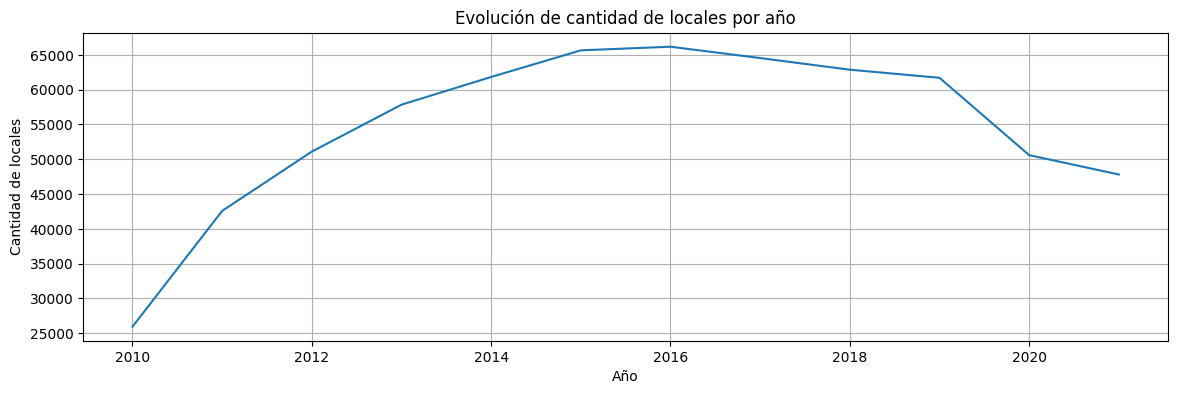

In [31]:
business_evolution = dfychk.groupby(['year']).agg({'business_id': 'nunique'}).reset_index()

plt.figure(figsize=(14, 4))
sns.lineplot(data=business_evolution, x='year', y='business_id')
plt.title('Evolución de cantidad de locales por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de locales')
plt.grid(True)

Conclusiones:
* El gráfico muestra la cantidad de locales registrados en yelp a lo largo del tiempo, medido en años
* Tomando a YELP como un producto e observan claramente las fases de:
    * Nacimiento, en 2010
    * Evolución y desarrollo, entre 2012 y 2014
    * Posicionamiento y estabilización en el mercado, entre 2015 y 2019 
    * Involución, en 2020 -- esto último causado por el covid19


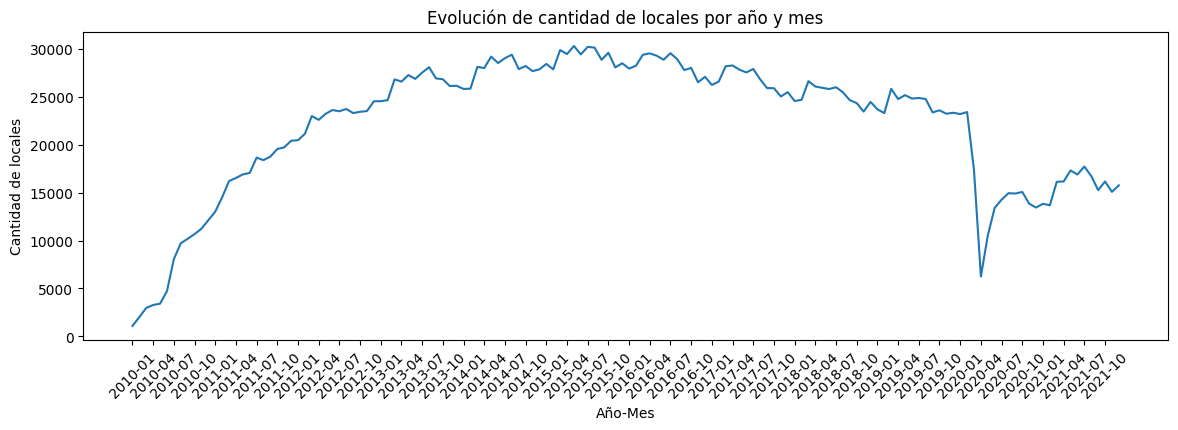

In [32]:
dfychk['year_month'] = dfychk['year'].astype(str) + '-' + dfychk['month'].astype(str).str.zfill(2)

business_evolution = dfychk.groupby(['year_month']).agg({'business_id': 'nunique'}).reset_index()

selected_dates = business_evolution.iloc[::3, 0]

plt.figure(figsize=(14, 4))
sns.lineplot(data=business_evolution, x='year_month', y='business_id')
plt.title('Evolución de cantidad de locales por año y mes')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de locales')
plt.xticks(selected_dates, rotation=45)
plt.grid(False)
plt.show()

Conclusiones:
* El gráfico muestra la cantidad de locales registrados en yelp a lo largo del tiempo, medido en años y meses
* La baja de actividad a principios del año 2020 se debe al covid19, a partir de entonces se muestra una recuperación
* La serie muestra estabilidad entre 2013 y 2019, en donde se contiene un rango de entre 17500 y 20000 locales registrados

=======================================================

## Análisis de demanda

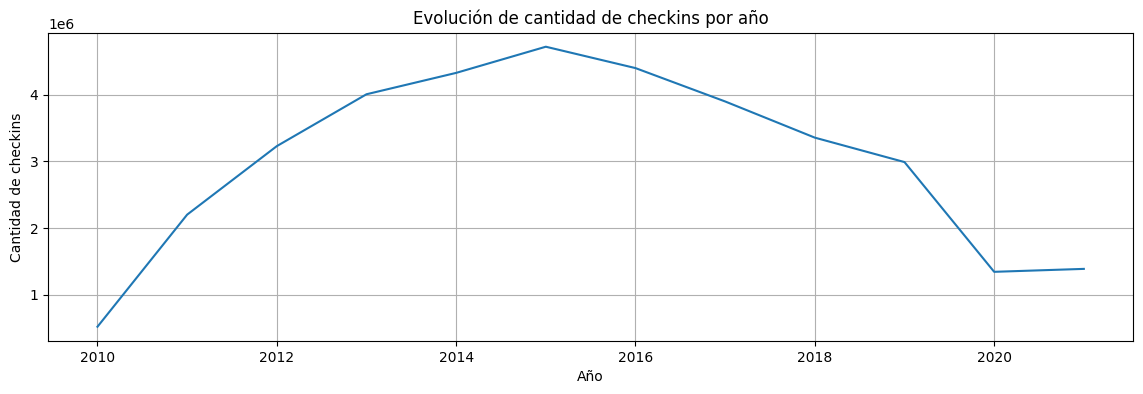

In [33]:
# Evolución de checkins
checkins_evolution = dfychk.groupby(['year']).agg({'date': 'count'}).reset_index()

plt.figure(figsize=(14, 4))
sns.lineplot(data=checkins_evolution, x='year', y='date')

plt.title('Evolución de cantidad de checkins por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de checkins')
plt.grid(True)

Conclusiones:
* El gráfico muestra la cantidad de check-ins registrados en yelp a lo largo del tiempo, medido en años
* La baja de actividad a partir del 2015 puede deberse a la fuerte entrada del mercado de delivery

## Análisis de preferencias de usuario

### Categorías top

Text(0, 0.5, 'Categoría')

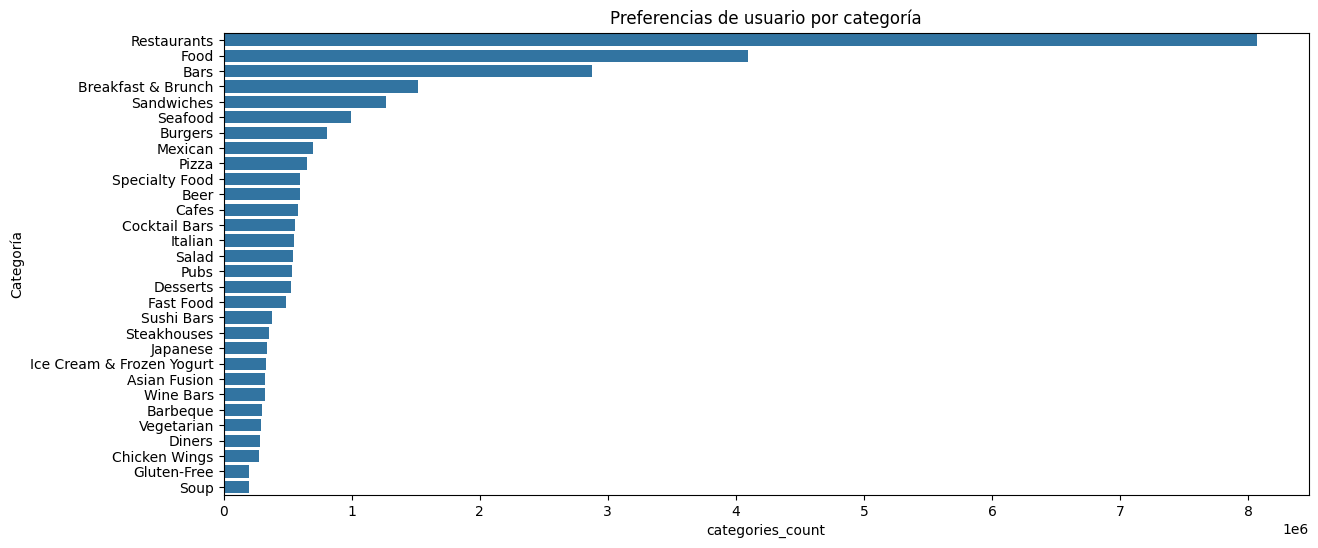

In [34]:
# Análisis de categorías
dfychk_categories = dfychk.groupby(['categories']).agg({'date':'count'})
dfychk_categories.rename(columns={'date': 'categories_count'}, inplace=True)
dfychk_categories = dfychk_categories.reset_index()
dfychk_categories = dfychk_categories.sort_values(by='categories_count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x="categories_count", y="categories", data=dfychk_categories.head(30))
plt.title('Preferencias de usuario por categoría')
plt.ylabel('Categoría')

Conclusiones
* El gráfico de barras horizontales muestra las categorías más elegidas, en forma descendente, para todos los restaurantes registrados en yelp USA
* La categoría "Restaurants" es muy general y es la más elegida. Puede deberse a que el usuario no planifica qué comida va a tener, por lo que se dirige a un establecimiento de comida general y toma su decisión basada en el menú -- esto indica que hay una oportunidad para crear un sistema de recomendación


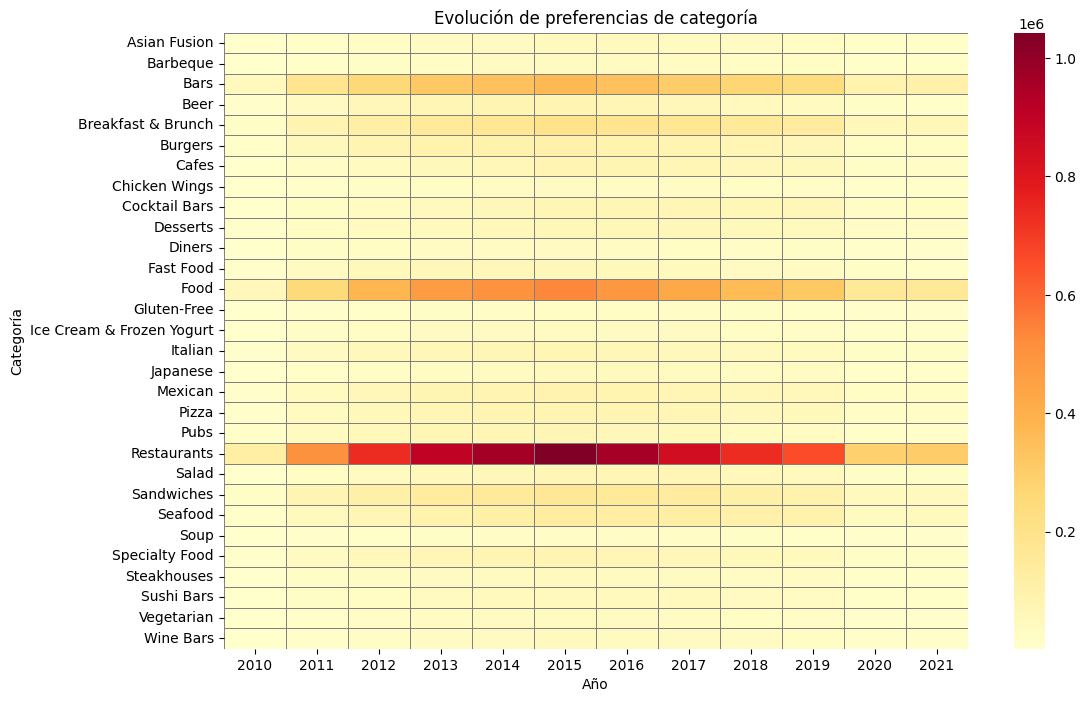

In [35]:
# Evolución de preferencias de las categorías top
dfychk_categories_top = dfychk_categories.head(30)

dfychk_categories_evol = pd.merge(dfychk, dfychk_categories_top, on='categories')
dfychk_categories_evol = dfychk_categories_evol.pivot_table(index='categories', columns='year', values='date', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(dfychk_categories_evol, cmap='YlOrRd', linewidths=0.5, linecolor='gray')

plt.title('Evolución de preferencias de categoría')
plt.xlabel('Año')
plt.ylabel('Categoría')
plt.yticks(rotation=0)
plt.show()

Conclusiones:
* El mapa de calor muestra la evolución anual de check-ins por categoría
* Nuevamente, la categoría "Restaurants" muestra ser la más elegida, pero aquí se nota su sustentabilidad en el tiempo

### Marcas top

Text(0, 0.5, 'Categoría')

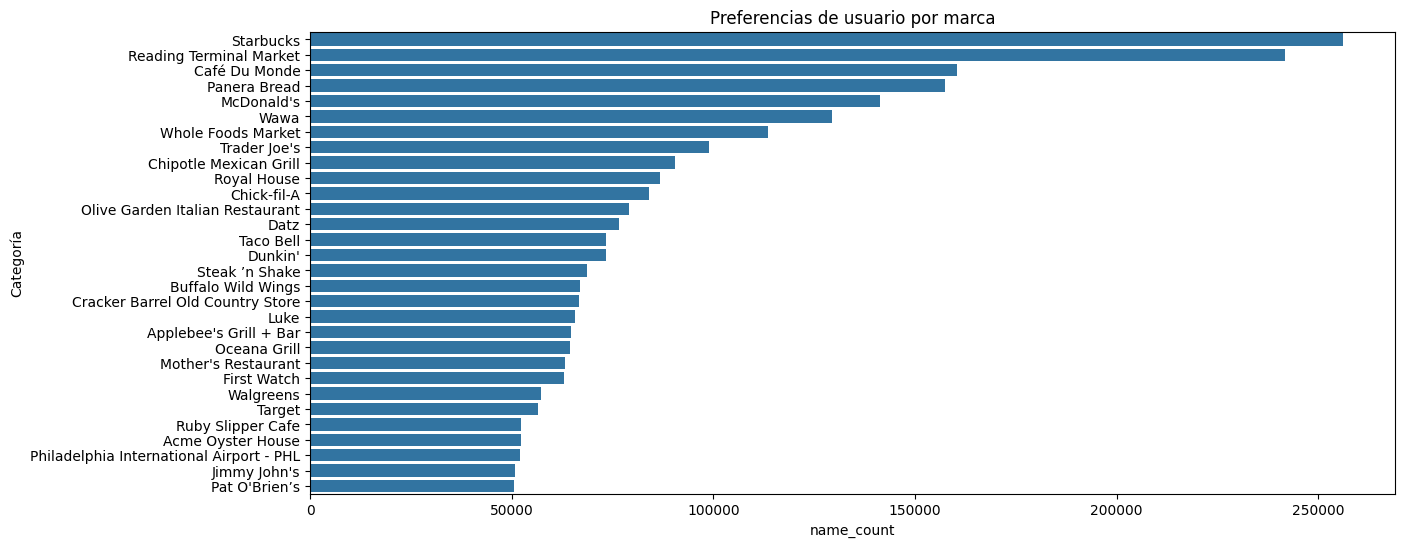

In [36]:
# Análisis de marcas
dfychk_name = dfychk.groupby(['name']).agg({'date':'count'})
dfychk_name.rename(columns={'date':'name_count'}, inplace=True)
dfychk_name = dfychk_name.reset_index()
dfychk_name = dfychk_name.sort_values(by='name_count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x="name_count", y="name", data=dfychk_name.head(30))
plt.title('Preferencias de usuario por marca')
plt.ylabel('Categoría')

Conclusiones:
* Las dos marcas líderes como "Starbucks" y "Reading Terminal Market" ofrecen no solamente una experiencia gastronómica, sino un espacio social y de distensión. "Reading Terminal Market" es un espacio de paseo de compras y adyacentemente cuenta con un mercado gastronómico. Esta variable debe tenerse dentro de los atributos considerados para un sistema de recomendación
* Las dos marcas que le siguen son cafeterías, luego dos locales de comidas rápidas ("McDonalds" y "Wawa"), para luego continuar con otros mercados de comida que ofrecen paseos
* Lo notable de esto es que no hay ningún restaurante tradicional dentro de las primeras diez categorías 


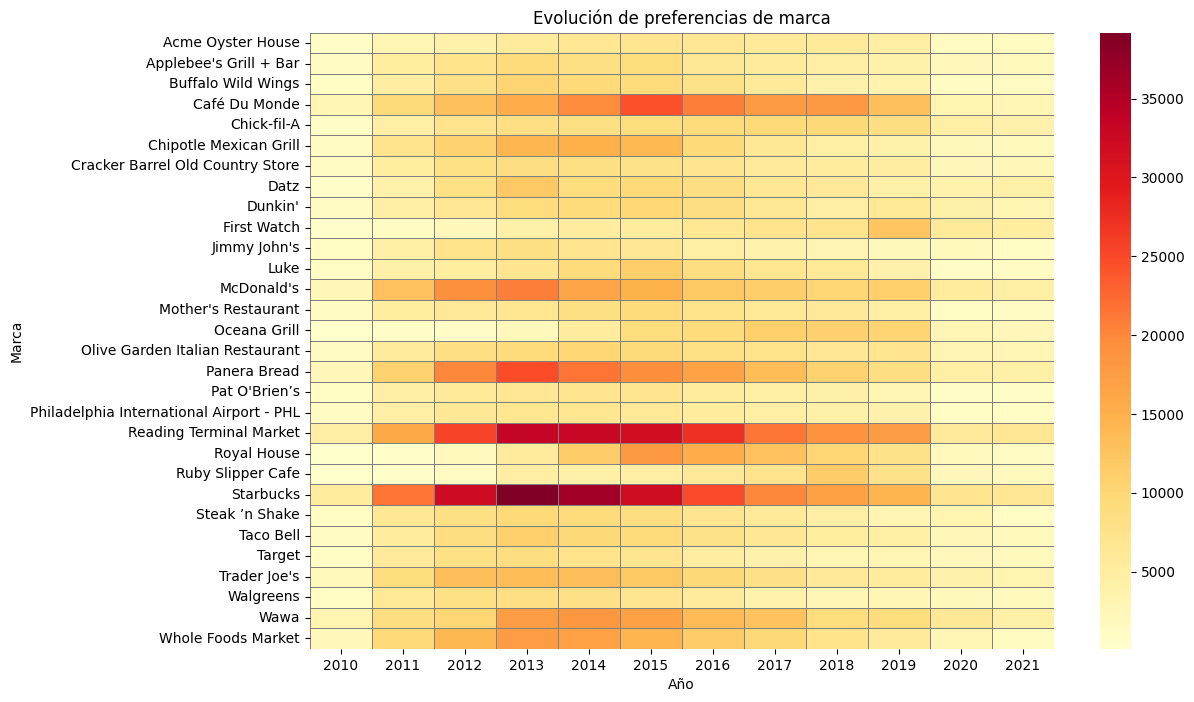

In [37]:
# Evolución de preferencias de las marcas top
dfychk_name_top = dfychk_name.head(30)

dfychk_name_evol = pd.merge(dfychk, dfychk_name_top, on='name')
dfychk_name_evol = dfychk_name_evol.pivot_table(index='name', columns='year', values='date', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(dfychk_name_evol, cmap='YlOrRd', linewidths=0.5, linecolor='gray')

plt.title('Evolución de preferencias de marca')
plt.xlabel('Año')
plt.ylabel('Marca')
plt.yticks(rotation=0)
plt.show()

Conclusiones:
* El mapa de calor muestra la evolución anual de check-ins por marca
* Claramente "Starbucks" se ha posicionado como líder, seguido de "Reading Terminal Market"
* El factor común que muestran todas estas marcas es que muestran una tendencia a permancer 4-5 años en forma fuerte, para luego bajar su participación

### Locaciones top

Text(0, 0.5, 'Locación')

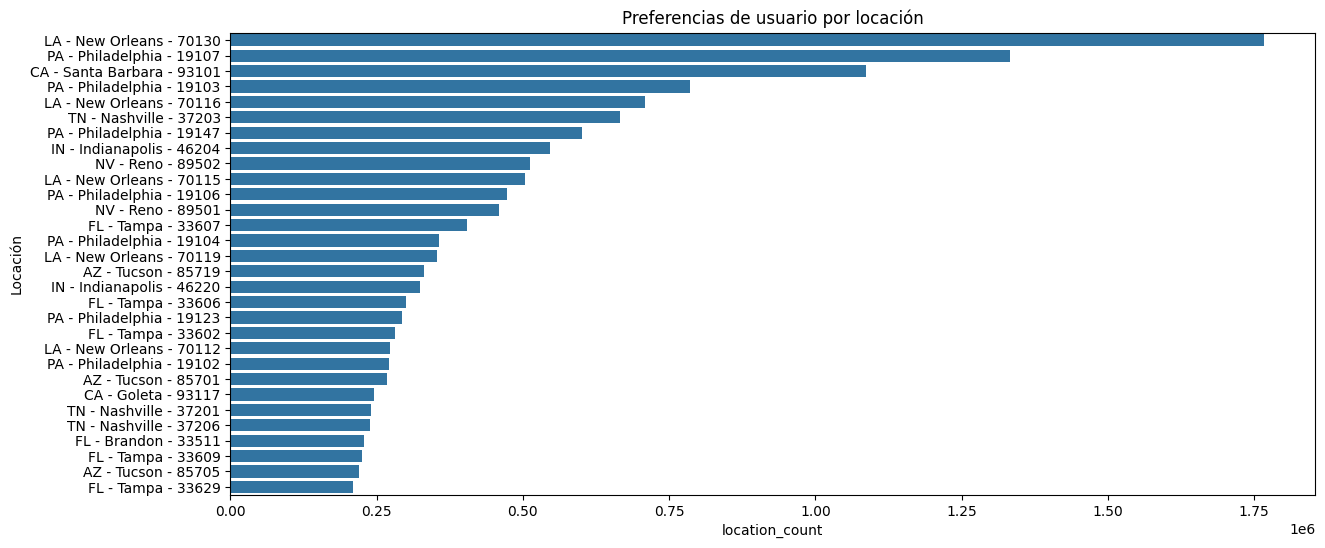

In [38]:
# Análisis de locaciones
dfychk_location = dfychk.groupby(['state_city_postalcode']).agg({'date':'count'})
dfychk_location.rename(columns={'date':'location_count'}, inplace=True)
dfychk_location = dfychk_location.reset_index()
dfychk_location = dfychk_location.sort_values(by='location_count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x="location_count", y="state_city_postalcode", data=dfychk_location.head(30))
plt.title('Preferencias de usuario por locación')
plt.ylabel('Locación')

Conclusiones:
* El gráfico de barras horizontales muestra la cantidad acumulada de check-ins, por locación (Estado - Ciudad - Código postal)
* Las locaciones líderes son New Orleans, Philadelphia y Santa Barbara

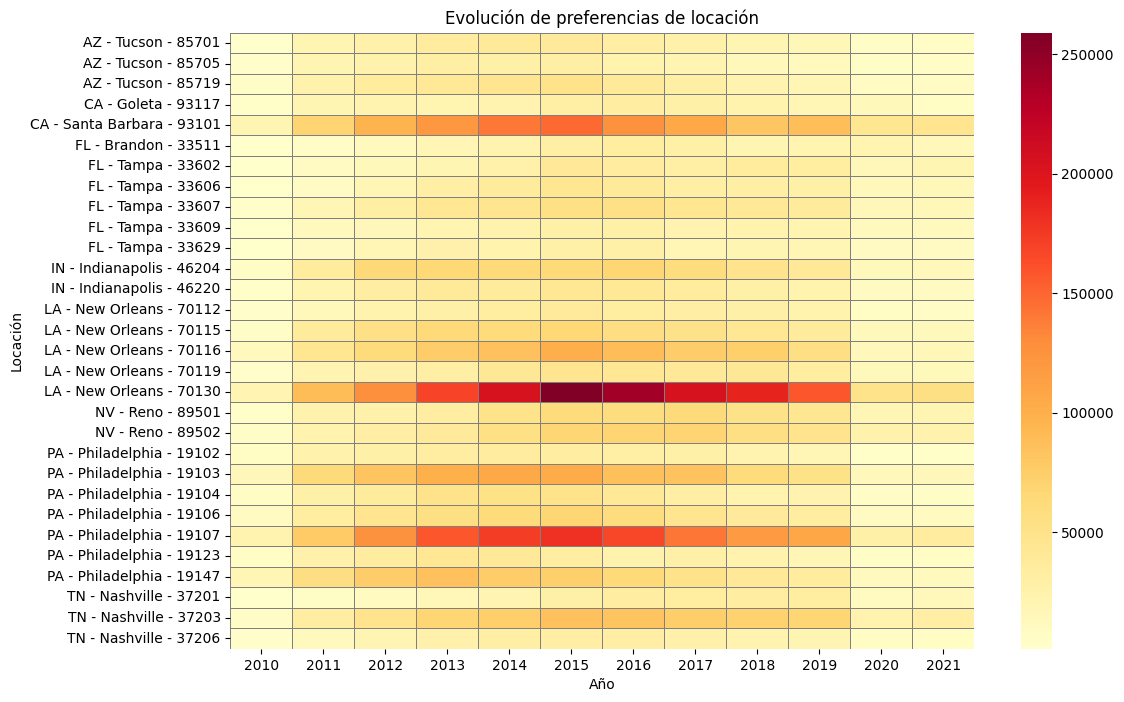

In [39]:
# Evolución de preferencias de las locaciones top
dfychk_location_top = dfychk_location.head(30)

dfychk_location_evol = pd.merge(dfychk, dfychk_location_top, on='state_city_postalcode')
dfychk_location_evol = dfychk_location_evol.pivot_table(index='state_city_postalcode', columns='year', values='date', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(dfychk_location_evol, cmap='YlOrRd', linewidths=0.5, linecolor='gray')

plt.title('Evolución de preferencias de locación')
plt.xlabel('Año')
plt.ylabel('Locación')
plt.yticks(rotation=0)
plt.show()

Conclusiones:
* El mapa de calor muestra la evolución anual de los check-ins, por locación
* Las locaciones tienden a tener entre 4 y 5 años de apogeo, detectando luego una baja de actividad

# Conclusiones
====================================================================================================================================

El presente EDA corresponde al análisis de oferta y demanda del dataset de Yelp, así como el análisis de preferencias de usuarios.

El pre-procesamiento de datos consistió en las siguientes tareas:
* Gestión de tipos de datos
* Gestión de valores nulos
* Gestión de valores duplicados
* Gestión de características: eliminación de campos innecesarios y agregado de campos auxiliares 

Observaciones respecto al pre-procesamiento de datos:
* Se ha utilizado un dataset de códigos postales para corregir el dataset original de "business", ya que se detectó un error en el dataset original. 
* No se encontraron grandes cantidades de valores nulos, y no se encontraron duplicados que afecten a los datos. 
* Se modificaron algunos tipos de datos, sobre todo de aquellos campos de valor tipo "fecha"
* Se agregaron algunas características o campos auxiliares para facilitar el posterior agrupamiento y visualización de datos

Respecto al análisis de datos, se ha considerado estudiar el mercado a través de la oferta y demanda, y las preferencias del usuario. 
* Para valorizar la oferta, se ha considerado la cantidad de locales registrados en yelp
* Para valorizar la demanda, se ha considerado la cantidad de check-ins registrados
* Para conocer las preferencias del usuario, se consideran también los check-ins agrupados por categorías, marcas y locaciones